<a href="https://colab.research.google.com/github/KokiNiimura/study/blob/master/tutorial04_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                        shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                        shuffle=False, num_workers=2)

classes = ('plane', 'cat', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainloader.__len__()

12500

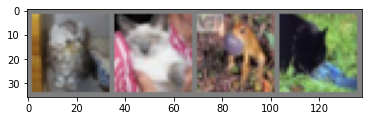

  cat   cat  frog   cat


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [7]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
history = []

In [10]:
for epoch in range(20):
    train_loss = 0.0
    for data in trainloader:
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        train_loss += loss
        
        loss.backward()
        optimizer.step()

    val_loss = 0.0
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

    train_loss /= trainloader.__len__()
    val_loss /= testloader.__len__()
    history.append({"epoch": epoch, "train_loss" : train_loss, "val_loss" : val_loss}) 

    print("epoch {} ".format(epoch))
    print("train_loss: {:.4f} val_loss: {:.4f}".format(train_loss, val_loss))

print('Finished Training')

epoch 0 
train_loss: 1.6868 val_loss: 1.4158
epoch 1 
train_loss: 1.3156 val_loss: 1.2277
epoch 2 
train_loss: 1.1758 val_loss: 1.1589
epoch 3 
train_loss: 1.0804 val_loss: 1.1438
epoch 4 
train_loss: 1.0156 val_loss: 1.0955
epoch 5 
train_loss: 0.9597 val_loss: 1.0766
epoch 6 
train_loss: 0.9148 val_loss: 1.0711
epoch 7 
train_loss: 0.8737 val_loss: 1.0855
epoch 8 
train_loss: 0.8413 val_loss: 1.0923
epoch 9 
train_loss: 0.8116 val_loss: 1.1332
epoch 10 
train_loss: 0.7880 val_loss: 1.1358
epoch 11 
train_loss: 0.7613 val_loss: 1.1550
epoch 12 
train_loss: 0.7411 val_loss: 1.2126
epoch 13 
train_loss: 0.7187 val_loss: 1.2186
epoch 14 
train_loss: 0.7032 val_loss: 1.2608
epoch 15 
train_loss: 0.6884 val_loss: 1.3041
epoch 16 
train_loss: 0.6785 val_loss: 1.2933
epoch 17 
train_loss: 0.6644 val_loss: 1.2756
epoch 18 
train_loss: 0.6536 val_loss: 1.3459
epoch 19 
train_loss: 0.6428 val_loss: 1.3852
Finished Training


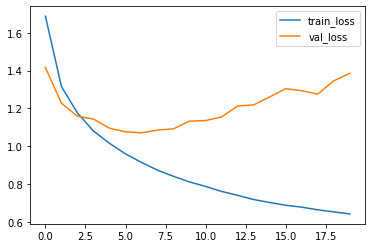

In [11]:
epoch = []
train_loss = []
val_loss = []
for log in history:
    epoch.append(log["epoch"])
    train_loss.append(log["train_loss"])
    val_loss.append(log["val_loss"])

plt.plot(epoch, train_loss, label='train_loss')
plt.plot(epoch, val_loss, label='val_loss')
plt.legend()

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

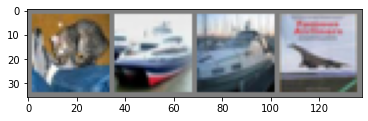

GroudTruth:     cat   ship   ship  plane


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroudTruth: ', ' '.join(' %5s' % classes[labels[j]] for j in range(4)))

In [14]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracu of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracu of plane : 63 %
Accuracu of   cat : 71 %
Accuracu of  bird : 62 %
Accuracu of   cat : 40 %
Accuracu of  deer : 51 %
Accuracu of   dog : 48 %
Accuracu of  frog : 64 %
Accuracu of horse : 57 %
Accuracu of  ship : 82 %
Accuracu of truck : 67 %
